In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

In [2]:
url_api= "https://pokeapi.co/api/v2/pokemon/"
consulta=requests.get(url_api) #200 si la respuesta es correcta
consulta

<Response [200]>

In [3]:
Pokemon = {"Nombre":[],
            "Color":[],
            "tipo":[],
            "altura":[],
            "peso":[]}

In [ ]:
for i in range(1,150):
    requ=requests.get("https://pokeapi.co/api/v2/pokemon/{}/".format(i))
    Pokemon["Nombre"].append(requ.json()["name"])
    Pokemon["tipo"].append(requ.json()["types"][0]["type"]["name"])
    Pokemon["Color"].append(requests.get (requ.json () ["species"]["url"]).json() ["color"]["name"])
    Pokemon["altura"].append(requ.json()["height"])
    Pokemon['peso'].append(requ.json()["weight"])
    next

In [4]:
i=1
while requests.get("https://pokeapi.co/api/v2/pokemon/{}/". format (i)).status_code==200: 
        requ=requests.get("https://pokeapi.co/api/v2/pokemon/{}/".format(i)).json()
        Pokemon["Nombre"].append(requ["name"])
        Pokemon["tipo"].append(requ["types"][0]["type"]["name"])
        Pokemon["Color"].append(requests.get (requ["species"]["url"]).json() ["color"]["name"])
        Pokemon["altura"].append(requ["height"])
        Pokemon['peso'].append(requ["weight"])
        i=i+1

In [5]:
pokedf=pd.DataFrame(Pokemon)
pokedf

,Nombre,Color,tipo,altura,peso
0,bulbasaur,green,grass,7,69
1,ivysaur,green,grass,10,130
2,venusaur,green,grass,20,1000
3,charmander,red,fire,6,85
4,charmeleon,red,fire,11,190
...,...,...,...,...,...
893,regieleki,yellow,electric,12,1450
894,regidrago,green,dragon,21,2000
895,glastrier,white,ice,22,8000
896,spectrier,black,ghost,20,445


array([<AxesSubplot:ylabel='Nombre'>], dtype=object)

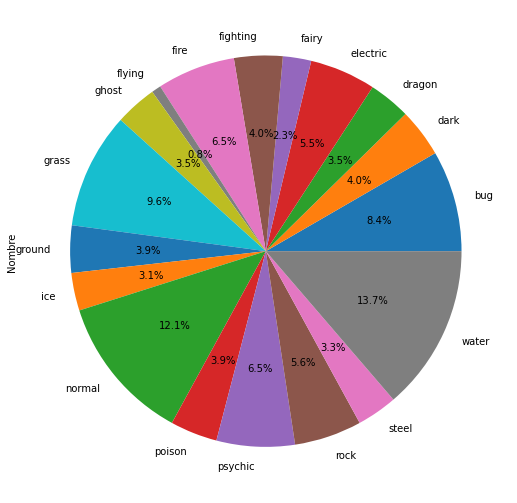

In [6]:
pokedf[["tipo","Nombre"]].groupby("tipo").count().plot(kind="pie", subplots=True, figsize=(9,9),autopct='%1.1f%%', legend=False)

<AxesSubplot:xlabel='tipo'>

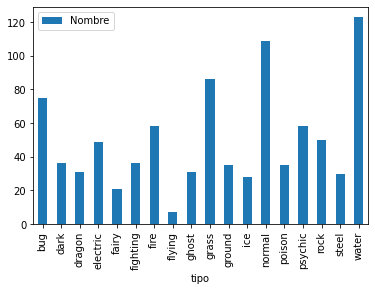

In [7]:
pokedf[["tipo","Nombre"]].groupby("tipo").count().plot(kind="bar")

In [ ]:
dfpokemon=pd.read_csv("pokemon.csv")
dfpokemon

In [8]:
dfpokemongp=pokedf.groupby("tipo")

In [9]:
dfpokemongp.agg({"peso":["max","min","mean","std"],"altura":["max","min","mean","std"]})

peso                               altura                          
           max min         mean          std    max min       mean        std
tipo                                                                         
bug       3336   2   326.706667   521.407626     25   1   8.640000   5.468929
dark      8880  21   618.777778  1474.598369     58   4  12.638889  11.632842
dragon    3450  20  1024.451613  1061.189579     70   3  19.129032  14.284588
electric  1900   3   429.367347   518.625173     38   2   9.959184   7.079781
fairy     2150   1   254.666667   505.919691     30   1   8.380952   8.102322
fighting  2538  40   615.027778   589.859765     30   5  12.666667   6.356099
fire      4300  10   606.051724   765.731881     38   3  11.706897   6.719985
flying     850  18   381.142857   348.744141     22   2  10.714286   6.921327
ghost     7500   1   608.838710  1413.962826     45   1  11.580645   9.814188
grass     3100   1   326.616279   495.092485     33   2   9.209302   6.170359
ground    9500   8  1231.857143  2181.594845     38   2  13.514286   8.786257
ice       8000  38  1202.857143  1753.646227     26   3  12.321429   6.134623
normal    4600   8   438.321101   708.853859     37   2   9.972477   6.499941
poison    9500  10   621.914286  1581.433701    200   4  17.457143  32.756987
psychic   9999   1   523.982759  1371.792431     52   1  10.500000   9.283545
rock      8200  57  1200.260000  1506.090300     88   3  13.860000  13.854948
steel     9999  11  2052.733333  2692.297774     92   2  18.166667  22.674737
water     3980   3   522.593496   710.531512    145   2  12.731707  15.376197

In [10]:
dfpokemongp2=dfpokemongp

In [11]:
dfpokemongp2=dfpokemongp.agg({"tipo":["count"],"peso":["max","min","mean","std"],"altura":["max","min","mean","std"]})

In [12]:
dfpokemongp2.reset_index(level=0,inplace=True)

In [13]:
dfpokemongp2

tipo        peso                               altura                 \
             count   max min         mean          std    max min       mean   
0        bug    75  3336   2   326.706667   521.407626     25   1   8.640000   
1       dark    36  8880  21   618.777778  1474.598369     58   4  12.638889   
2     dragon    31  3450  20  1024.451613  1061.189579     70   3  19.129032   
3   electric    49  1900   3   429.367347   518.625173     38   2   9.959184   
4      fairy    21  2150   1   254.666667   505.919691     30   1   8.380952   
5   fighting    36  2538  40   615.027778   589.859765     30   5  12.666667   
6       fire    58  4300  10   606.051724   765.731881     38   3  11.706897   
7     flying     7   850  18   381.142857   348.744141     22   2  10.714286   
8      ghost    31  7500   1   608.838710  1413.962826     45   1  11.580645   
9      grass    86  3100   1   326.616279   495.092485     33   2   9.209302   
10    ground    35  9500   8  1231.857143  2181.594845     38   2  13.514286   
11       ice    28  8000  38  1202.857143  1753.646227     26   3  12.321429   
12    normal   109  4600   8   438.321101   708.853859     37   2   9.972477   
13    poison    35  9500  10   621.914286  1581.433701    200   4  17.457143   
14   psychic    58  9999   1   523.982759  1371.792431     52   1  10.500000   
15      rock    50  8200  57  1200.260000  1506.090300     88   3  13.860000   
16     steel    30  9999  11  2052.733333  2692.297774     92   2  18.166667   
17     water   123  3980   3   522.593496   710.531512    145   2  12.731707   

               
          std  
0    5.468929  
1   11.632842  
2   14.284588  
3    7.079781  
4    8.102322  
5    6.356099  
6    6.719985  
7    6.921327  
8    9.814188  
9    6.170359  
10   8.786257  
11   6.134623  
12   6.499941  
13  32.756987  
14   9.283545  
15  13.854948  
16  22.674737  
17  15.376197

In [14]:
def pokecolumn(x):
    NombrePokemon=[]
    for i in range(len(dfpokemongp2)):
        NombrePokemon.append(pokedf[(pokedf['tipo']==dfpokemongp2["tipo"][""][i]) & 
                                    (pokedf[x]==dfpokemongp2[x,y][i])]["Nombre"].values[:])
    dfpokemongp2["Nombre Pokemon "+y,x]=NombrePokemon

def pokecoincide(x):
    NombrePokemon=[]

In [15]:
def pokenumplus(x):
    NombrePokemon=[]
    for i in range(len(dfpokemongp2)):
        NombrePokemon.append(len(pokedf[(pokedf['tipo']==dfpokemongp2["tipo"][""][i]) & 
                                        (pokedf[x]<dfpokemongp2[x,y][i])]["Nombre"].values[:]))
    dfpokemongp2["Numero de Pokemon mayor a "+y,x]=NombrePokemon
def pokenumminus(x):
    NombrePokemon=[]
    for i in range(len(dfpokemongp2)):
        NombrePokemon.append(len(pokedf[(pokedf['tipo']==dfpokemongp2["tipo"][""][i]) & 
                                        (pokedf[x]>dfpokemongp2[x,y][i])]["Nombre"].values[:]))
    dfpokemongp2["Numero de Pokemon menor a "+y,x]=NombrePokemon

In [25]:
y="std"
pokenumminus("altura")

In [26]:
dfpokemongp2

tipo        peso                               altura                 \
             count   max min         mean          std    max min       mean   
0        bug    75  3336   2   326.706667   521.407626     25   1   8.640000   
1       dark    36  8880  21   618.777778  1474.598369     58   4  12.638889   
2     dragon    31  3450  20  1024.451613  1061.189579     70   3  19.129032   
3   electric    49  1900   3   429.367347   518.625173     38   2   9.959184   
4      fairy    21  2150   1   254.666667   505.919691     30   1   8.380952   
5   fighting    36  2538  40   615.027778   589.859765     30   5  12.666667   
6       fire    58  4300  10   606.051724   765.731881     38   3  11.706897   
7     flying     7   850  18   381.142857   348.744141     22   2  10.714286   
8      ghost    31  7500   1   608.838710  1413.962826     45   1  11.580645   
9      grass    86  3100   1   326.616279   495.092485     33   2   9.209302   
10    ground    35  9500   8  1231.857143  2181.594845     38   2  13.514286   
11       ice    28  8000  38  1202.857143  1753.646227     26   3  12.321429   
12    normal   109  4600   8   438.321101   708.853859     37   2   9.972477   
13    poison    35  9500  10   621.914286  1581.433701    200   4  17.457143   
14   psychic    58  9999   1   523.982759  1371.792431     52   1  10.500000   
15      rock    50  8200  57  1200.260000  1506.090300     88   3  13.860000   
16     steel    30  9999  11  2052.733333  2692.297774     92   2  18.166667   
17     water   123  3980   3   522.593496   710.531512    145   2  12.731707   

               Nombre Pokemon max                        Nombre Pokemon min  \
          std                peso                 altura               peso   
0    5.468929          [buzzwole]            [scolipede]         [cutiefly]   
1   11.632842          [guzzlord]              [yveltal]          [murkrow]   
2   14.284588            [zekrom]             [rayquaza]           [dreepy]   
3    7.079781         [dracozolt]            [xurkitree]    [rotom, tynamo]   
4    8.102322           [xerneas]              [xerneas]          [flabebe]   
5    6.356099          [hariyama]              [falinks]        [clobbopus]   
6    6.719985           [heatran]                [ho-oh]       [sizzlipede]   
7    6.921327           [noivern]          [corviknight]         [rookidee]   
8    9.814188  [giratina-altered]     [giratina-altered]  [gastly, haunter]   
9    6.170359          [torterra]            [serperior]          [kartana]   
10   8.786257           [groudon]           [sandaconda]          [diglett]   
11   6.134623         [glastrier]              [beartic]             [snom]   
12   6.499941           [snorlax]            [regigigas]         [castform]   
13  32.756987         [eternatus]            [eternatus]          [koffing]   
14   9.283545           [cosmoem]                [lugia]           [cosmog]   
15  13.854948         [stakataka]                 [onix]          [carbink]   
16  22.674737        [celesteela]  [steelix, celesteela]          [jirachi]   
17  15.376197           [wailord]              [wailord]  [wishiwashi-solo]   

                                                      \
                                              altura   
0                                 [joltik, cutiefly]   
1                        [purrloin, inkay, impidimp]   
2                                            [goomy]   
3                                  [tynamo, dedenne]   
4                                  [flabebe, comfey]   
5                                           [mankey]   
6                                        [scorbunny]   
7                                         [rookidee]   
8                                         [sinistea]   
9   [budew, shaymin-land, foongus, morelull, applin]   
10                                         [diglett]   
11                                            [snom]   
12                                        

In [ ]:
dfpokemongp2=dfpokemongp2.drop(columns=["Numero de Pokemon menor a min"])

In [29]:
def filtro(x):
    df = pokedf.loc[pokedf["tipo"]==x]
    x2 = df['peso'] 
    y2 = df['altura']
    sns.jointplot (x=x2, y=y2, kind="reg")
    plt.title("Correlación pokemon de tipo " +x) 
    x_r = np.array(x2).reshape((-1,1))
    y_r = np.array(y2)

    modelo = LinearRegression().fit(x_r,y_r)
    b = modelo.intercept_
    m = modelo.coef_
    print('m, b={}'.format(m, b))

m, b=[0.00827098]


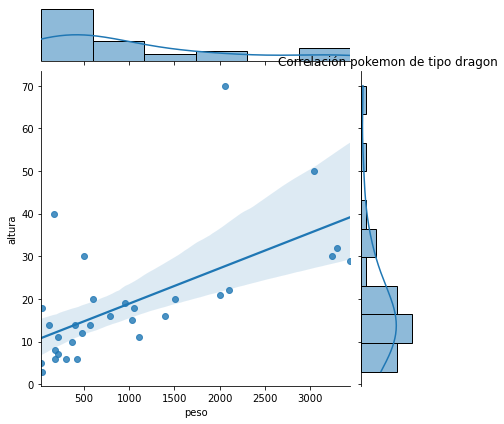

In [30]:
filtro("dragon")

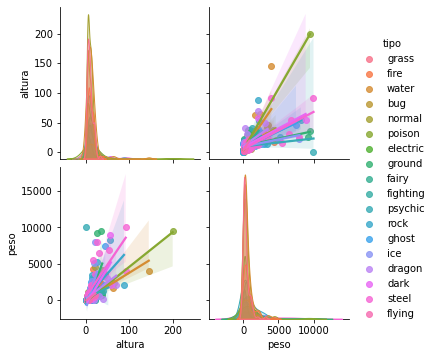

In [32]:
sns.pairplot(pokedf, kind="reg", hue="tipo")

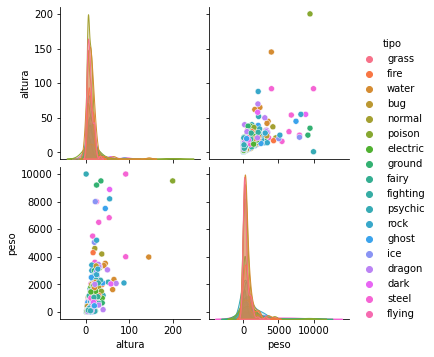

In [33]:
sns.pairplot(pokedf, hue="tipo")

In [ ]:
i=1
while requests.get("https://pokeapi.co/api/v2/pokemon/{}/". format (i)).status_code==200: 
        requ=requests.get("https://pokeapi.co/api/v2/pokemon/{}/".format(i)).json()
        Pokemon["Nombre"].append(requ["name"])
        Pokemon["tipo"].append(requ["types"][0]["type"]["name"])
        Pokemon["Color"].append(requests.get (requ["species"]["url"]).json() ["color"]["name"])
        Pokemon["altura"].append(requ["height"])
        Pokemon['peso'].append(requ["weight"])
        i=i+1